# Final Project: 
- <h3><b> ABHISHEK LUTHRA


In this project, we will explore the data and analyze the strength and weaknesses of the company. We have undertaken the following steps:
1) Data Cleaning and Pre-processing:  
   - Understand data structure 
   - Normalizing the data in terms of units and improving consistency
   - Removing duplicate entries, filling null entries
   - Removing unsused columns from the dataset
   - Changing datatypes to suit our analysis
   - Deducing new columns 
   
2) Data Exploration
   - Correlation Matrix
   - Histograms for Column Analysis
   - Heatmaps, barcharts, linegraph 
   - Trend Analysis, Time Series Analysis, Location Analysis

3) Conclusion
 

In [418]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [419]:
#Importing Dataset
df = pd.read_csv('sales_data.csv')

In [420]:
#Displaying Data
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# 1) Data Cleaning and Pre-Processing




# PART 1:

- Replacing NULL territory values for North American countries with 'Americas'
- Removing Japan as a territory
- Adding Japan, Singapore, Phillipines to APAC

In [421]:
#Checking Territory and Country Data
print(df.TERRITORY.unique())
print(df.COUNTRY.unique())

[nan 'EMEA' 'APAC' 'Japan']
['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']


In [422]:
##Adding another territory for Americas and Japan,Singapore,Phillipines to APAC
##Removed Japan from territory

df.loc[dff.COUNTRY.isin(['USA','Canada']) , 'TERRITORY'] = 'Americas'
df.loc[dff.COUNTRY.isin(['Singapore','Philippines','Japan']) , 'TERRITORY'] = 'APAC'



In [423]:
#Verifying the results
print(df.TERRITORY.unique())

['Americas' 'EMEA' 'APAC']


# PART 2:

- Understanding DAta Structure and Data Types

- Changing OrderDate's datatype to DateTime



In [424]:
df.info  

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \


In [425]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [426]:
##Changing OrderDate datatype to DateTime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [427]:
df['CONTACT']= df['CONTACTFIRSTNAME']+' '+df['CONTACTLASTNAME']

In [428]:
# To make sure columns with correct format (ex.without space to impact), the result is good,so we don't need to use strip function to deal it
col = df.columns.values
col


array(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'CONTACT'], dtype=object)

In [429]:
df


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CONTACT
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,Americas,Yu,Kwai,Small,Kwai Yu
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Paul Henriot
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,Americas,Young,Julie,Medium,Julie Young
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,Americas,Brown,Julie,Medium,Julie Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,Diego Freyre
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,Pirkko Koskitalo
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,Diego Freyre
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,Annette Roulet


# PART 3:

- Remove Duplicate Entries
- Statistical analysis using describe function
- Finding outliers and abnormal values
- Dropping unwanted Columns
- Replacing incorrect entries with NULL
- Changing DateFormat


In [430]:
df[df.duplicated()] # to inspect is any duplicated data in my data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CONTACT


In [431]:
round(df.describe().T,2) #View descriptive statistics for the data, rounded by 2 decimal points

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,10258.73,92.09,10100.00,10180.00,10262.0,10333.5,10425.0
QUANTITYORDERED,2823.0,35.09,9.74,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.66,20.17,26.88,68.86,95.7,100.0,100.0
ORDERLINENUMBER,2823.0,6.47,4.23,1.00,3.00,6.0,9.0,18.0
SALES,2823.0,3553.89,1841.87,482.13,2203.43,3184.8,4508.0,14082.8
QTR_ID,2823.0,2.72,1.20,1.00,2.00,3.0,4.0,4.0
MONTH_ID,2823.0,7.09,3.66,1.00,4.00,8.0,11.0,12.0
YEAR_ID,2823.0,2003.82,0.70,2003.00,2003.00,2004.0,2004.0,2005.0
MSRP,2823.0,100.72,40.19,33.00,68.00,99.0,124.0,214.0


In [432]:
sta = (df['PRICEEACH']-df['PRICEEACH'].mean())/df['PRICEEACH'].std()
sta.abs()
# I try to find abnormal value for price avoiding input error.

0       0.596872
1       0.114430
2       0.549286
3       0.019755
4       0.810014
          ...   
2818    0.810014
2819    0.810014
2820    0.810014
2821    1.061676
2822    0.899093
Name: PRICEEACH, Length: 2823, dtype: float64

In [433]:
df[sta.abs()>3] # the absolute value of standard deviation> 3 is abnormal value, the result is good.

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CONTACT


In [434]:
sum(df.SALES > df.PRICEEACH) #sales definitaly greater than price,we can see 2823 results is True to make sure all values is right

2823

In [435]:
# I don't need to use some columns as analysis result such as Name of the customer, phone number,address to be shipped, postal code and contact person's first and last name ,so I delete them 
df.drop(['PHONE','ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','CONTACTLASTNAME','CONTACTFIRSTNAME'],axis = 1, inplace = True )

In [436]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE,CONTACT
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,USA,Americas,Small,Kwai Yu
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,France,EMEA,Small,Paul Henriot
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,France,EMEA,Medium,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,USA,Americas,Medium,Julie Young
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,USA,Americas,Medium,Julie Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Madrid,NaN,Spain,EMEA,Small,Diego Freyre
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,NaN,Finland,EMEA,Medium,Pirkko Koskitalo
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Madrid,NaN,Spain,EMEA,Medium,Diego Freyre
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,Toulouse,NaN,France,EMEA,Small,Annette Roulet


<AxesSubplot:>

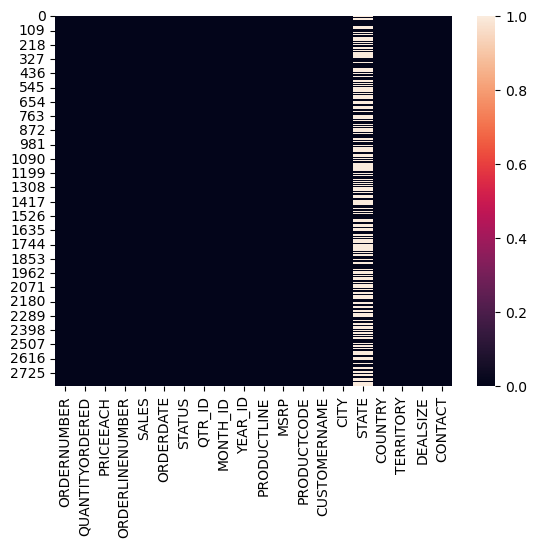

In [437]:
sns.heatmap(df.isnull()) #to find null based on useful info

In [438]:
df['TERRITORY'] = df['TERRITORY'].fillna('NA') 
df['STATE'] = df['STATE'].fillna('Outside the US')
#after observing column 'State', nulls are the cities outside the US,so I use ’Outside the US' to fullfill

In [439]:
#transfer the type of orderdate 
from pandas import to_datetime
df['ORDERDATE'] = to_datetime(df['ORDERDATE'])
type(df['ORDERDATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [440]:
# transfer to DD/Month/Year format
def fetch_att(x):
    DAY=x.day
    MONTH=x.month
    YEAR=x.year
    return pd.Series([DAY,MONTH,YEAR])

# PART 4:

- Verifying the results of pre-processing
- Checking whether data types are correct

In [441]:
df.isnull().sum() 
#finish null value fulling 

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
STATE              0
COUNTRY            0
TERRITORY          0
DEALSIZE           0
CONTACT            0
dtype: int64

In [442]:
df.dtypes # to check the type of data

ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
ORDERLINENUMBER             int64
SALES                     float64
ORDERDATE          datetime64[ns]
STATUS                     object
QTR_ID                      int64
MONTH_ID                    int64
YEAR_ID                     int64
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
CITY                       object
STATE                      object
COUNTRY                    object
TERRITORY                  object
DEALSIZE                   object
CONTACT                    object
dtype: object

# 2) Data Exploration

# PART 1:
- Finding Correlation between Columns
- Exploring Columns using histograms

<AxesSubplot:>

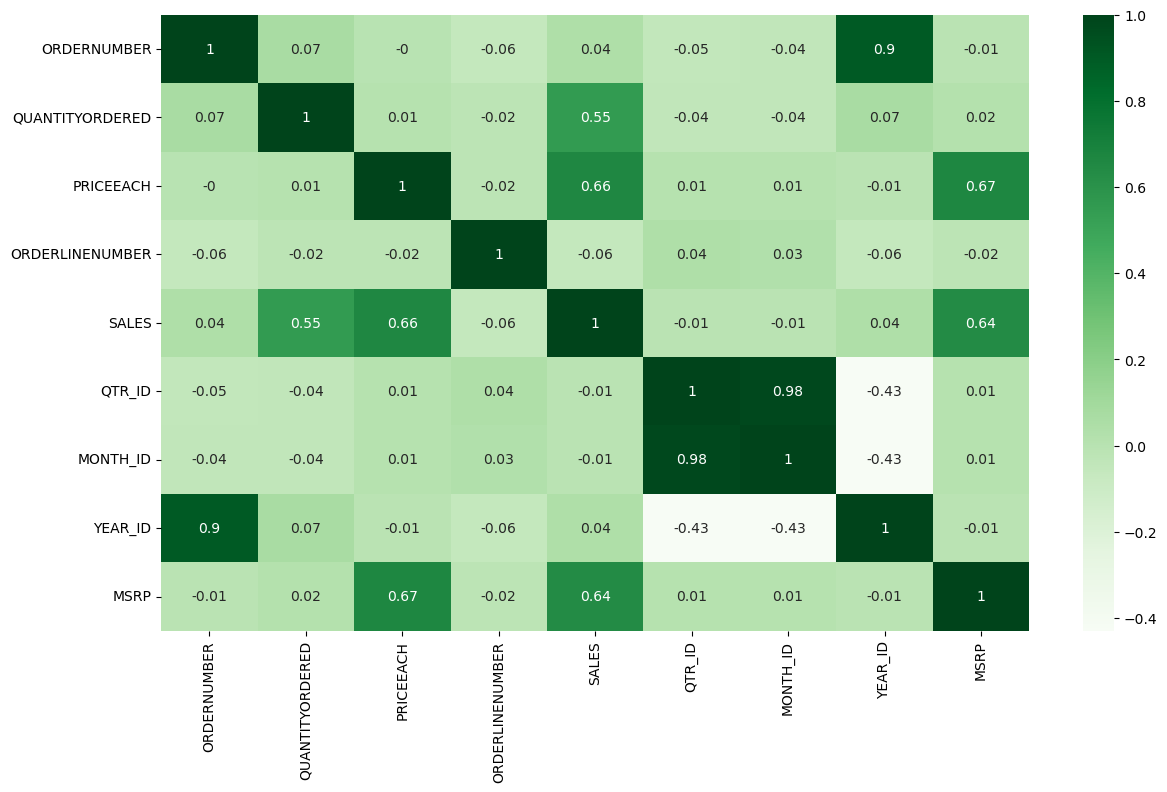

In [443]:
#Correlation between Columns
plt.figure(figsize=(14,8))
sns.heatmap(np.round(df.corr(),2),annot=True,cmap="Greens")

# Insights from Correlation Matrix:
* ORDERNUMBER and YEAR_ID are highly correlated as orders placed in later ears naturally have a higher ORDERNUMBER given that     these are assigned in progression
* Similarly QTR_ID and MONTH_ID are also highl correlated, since month is a componenet of the a quarter.
* We also see SALES, QUANTITYORDERED, PRICEEACH and MSRP are positively correlated

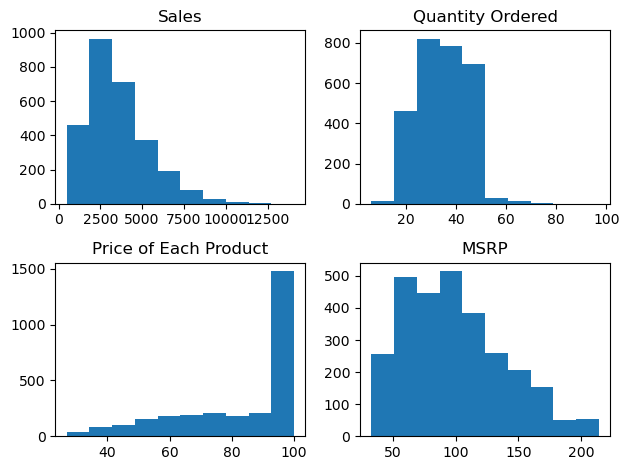

In [444]:
#Column Analysis
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df.SALES)
axs[0, 0].set_title('Sales')
axs[0, 1].hist(df.QUANTITYORDERED)
axs[0, 1].set_title('Quantity Ordered')
axs[1, 0].hist(df.PRICEEACH)
axs[1, 0].set_title('Price of Each Product')
axs[1, 1].hist(df.MSRP)
axs[1, 1].set_title('MSRP')
fig.tight_layout()

# Insights from Histograms

- Most product quantity ordered is between 20-50 units
- We also see that most products are priced close to 100
- This may be because the MSRP is close to 100 for most products, but there is a significant number of products with MSRP between 50-100,thus, the prices are set higher than the MSRP for quite a few products
-This may be one reason we observe a downward trend in sales

# PART 2: 

# Sales across Regions:

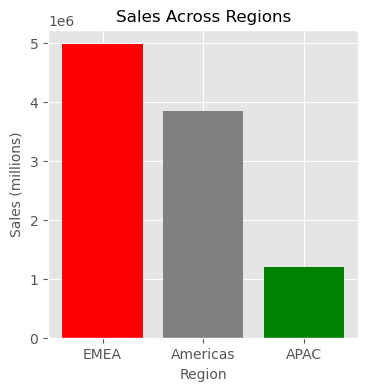

In [445]:
#Sales across regions

df_region= df[['TERRITORY','SALES']]
with plt.style.context('ggplot'):
  
  #Grouping by Territory
  df_region = df_region.groupby(df.TERRITORY).sum().sort_values(by='SALES', ascending=False)
  fig, ax = plt.subplots(figsize=(4, 4))
 
  #Displaying Title
  plt.title("Sales Across Regions", fontsize=12)
  
  #Plotting barchart
  plt.bar(x=df_region.index, height='SALES', color=['red','grey','green'], data=df_region)
  ax.set_xlabel('Region', fontsize=10)
  ax.set_ylabel('Sales (millions)', fontsize=10)
 
 
plt.show()


# Insights
- We see sales are highest in EMEA with the Americas region being a close second and APAC falling far behind both.

# PART 3:

# Sales across Product Category:

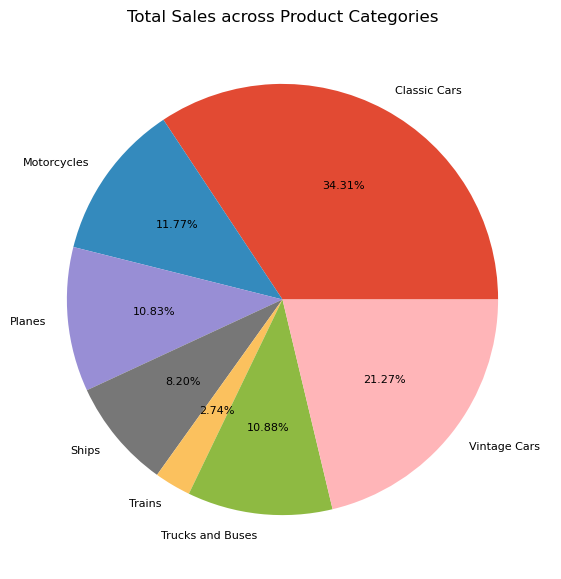

In [446]:
##Sales across product category

#Grouping sales across Product Category
sales_pc = df.groupby(['PRODUCTLINE'], as_index= False)['QUANTITYORDERED'].sum() 

with plt.style.context('ggplot'):
  
  plt.figure(figsize=(8,7))
  plt.pie(sales_pc.QUANTITYORDERED,labels = sales_pc.PRODUCTLINE , autopct='%.2f%%', textprops={'fontsize': 8})
  plt.title('Total Sales across Product Categories',fontsize=12)

plt.show()

# Insights:
- Sales are highest for Classic cars with vintage cars coming second
- The top two highest selling product categories, both cars, account for a simple majority of sales.

# Yearly Analysis:

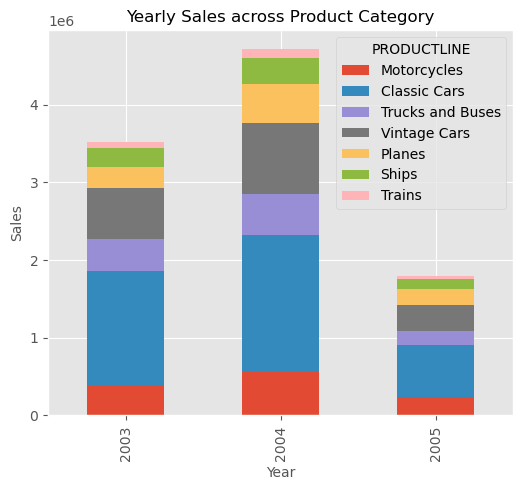

In [447]:
##Yearly Sales across ProductLine

yearwise = df.groupby(['YEAR_ID','PRODUCTLINE']).sum().reset_index()
##creating a pivot table to divide product categories
pcpivoted = pd.pivot_table(yearwise,values= 'SALES', index = ['YEAR_ID'], columns= ['PRODUCTLINE'], aggfunc= np.sum).reset_index()

pcdistinct = df.PRODUCTLINE.unique()
with plt.style.context('ggplot'):
  pcpivoted.plot.bar(x = 'YEAR_ID', y = pcdistinct, stacked = True,figsize=(6, 5))
  plt.ylabel('Sales', fontsize=10)
  plt.xlabel('Year', fontsize=10)
  plt.title("Yearly Sales across Product Category", fontdict={'fontsize': 12})
plt.show()

# Insights
- We see classic cars category consistently forming the major chunk of sales for each year, follwed by Vintage cars

# PART 4:

# Monthly Sales Analysis:

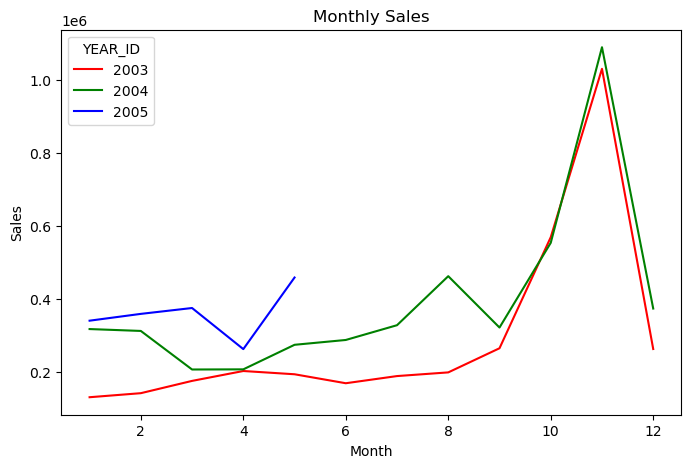

In [448]:
##Monthly Sales
plt.figure(figsize=(8,5))

monthly_sales = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", palette=['r','g','b'], data=monthly_sales)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

# Insights:
- Observing monthly sales, we see a very signiifcant spike near the end of the year, especialy November.
- This spike may be due to the holiday season and the mriad offers and discounts that are run during said season

# PART 5:

# Demographic Analysis: 

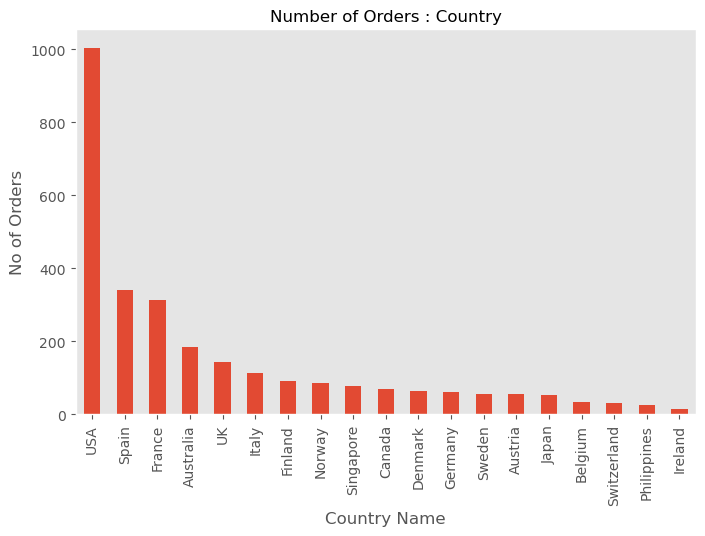

In [449]:
##Orders by countries
group_country_orders = df.groupby('COUNTRY')['ORDERNUMBER'].count().sort_values(ascending=False)
with plt.style.context('ggplot'):
  fig, ax = plt.subplots(figsize=(8,5))
  group_country_orders.plot(kind ='bar', fontsize=10)
  plt.ylabel('No of Orders', fontsize=12)
  plt.xlabel('Country Name', fontsize=12)
  plt.grid(False)
  plt.title('Number of Orders : Country', fontsize=12)
  plt.show()

# Insights:
- Sales are highest for the United States of America.
- But we see, of the top 10 regions, 6 are in EMEA, 2 in the Americas and 2 in APAC
- Thus, we know that USA, forms the majority of sales in the Americas.
- Also, int he EMEA region, where sales are the highest, Spain and France are our biggest markets

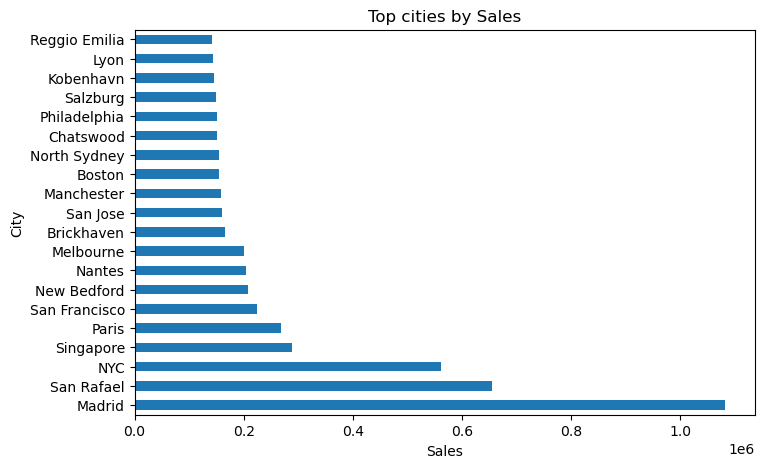

In [450]:
##Top cities by sales
plt.figure(figsize=(8,5))
topCity = df.groupby(['CITY'])['SALES'].sum().sort_values(ascending=False).head(20)
topCity.plot(kind = 'barh')
plt.title('Top cities by Sales',fontsize=12)
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

# Insights:
- But taking in account all cities of the world, Madrid significantly beat out San Rafael in sales, 
  forming a bulk of EMEA sales followed distantly by Paris and Nantes, the only other EMEA cities in top 10
- The APAC region only features 2 cities in top 10, Singapore and Melbourne
- USA accounts for the other 5 cities in top 10.

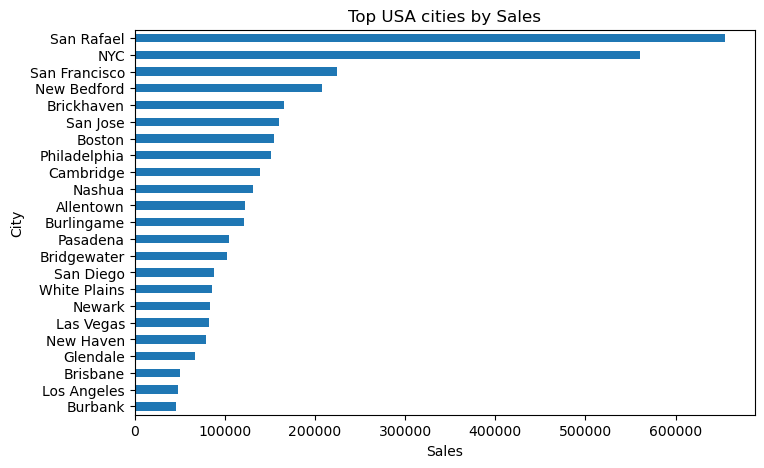

In [451]:
##Top USA cities by sales
#Comparing US' cities as US has the highest sales
plt.figure(figsize=(8,5))
us_city = df[df['COUNTRY'] == 'USA']
topUS = us_city.groupby(['CITY'])['SALES'].sum().sort_values(ascending=True)
topUS.plot(kind = 'barh')
plt.title('Top USA cities by Sales',fontsize=12)
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

# Insights:
- In the US, our biggest nationla market, San Rafael is where our sales are highest followed by New York City,
  with the rest following far behind

# PART 6:

# Findings on Customers:

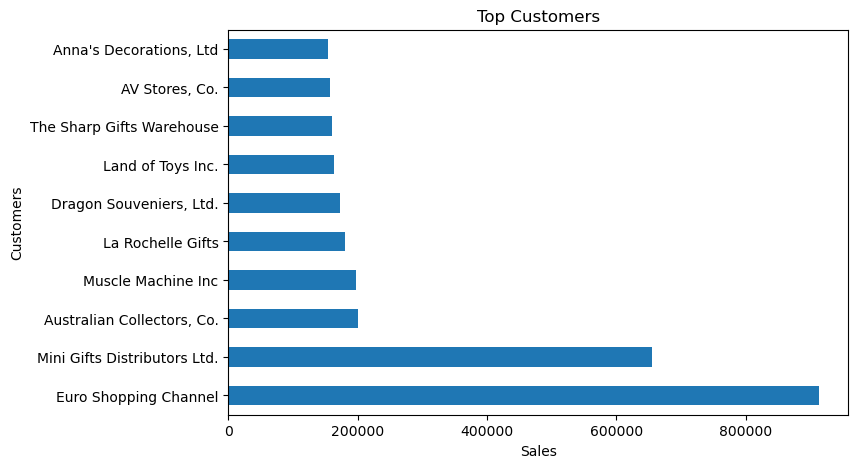

In [452]:
##Top customers by sales
plt.figure(figsize=(8,5))
topC = df.groupby(['CUSTOMERNAME'])['SALES'].sum().sort_values(ascending=False).head(10)
topC.plot(kind = 'barh')
plt.title('Top Customers',fontsize=12)
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.show()

# Insights:
- Euro Shopping Channel is our biggest client, followed by Mini Gifts Distributors Ltd.

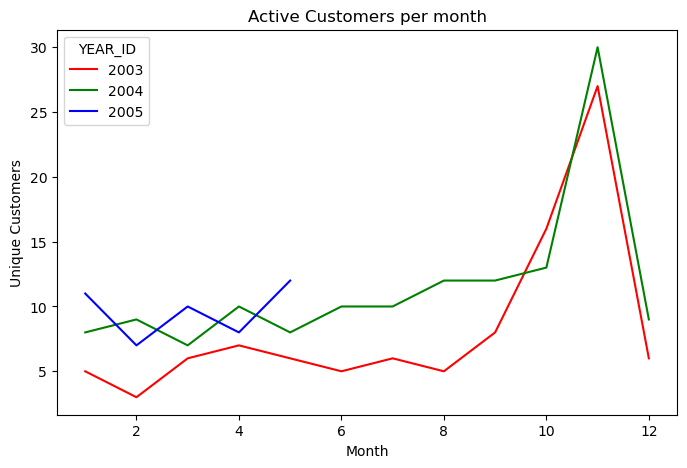

In [453]:
#Active Customers per Month
plt.figure(figsize=(8,5))

activecust = df.groupby(['YEAR_ID','MONTH_ID'])['CUSTOMERNAME'].nunique().reset_index()
sns.lineplot(x="MONTH_ID", y="CUSTOMERNAME",hue="YEAR_ID", palette=['r','g','b'], data=activecust)
plt.xlabel('Month')
plt.ylabel('Unique Customers')
plt.title('Active Customers per month')
plt.show()

# Insights:
- Across the 3 years, customers were the most active in the Month of November, followed by October.
- Looking at the sales graph in PART 4, we can see that both the graphs match closely as their activeness eventually translates into sales.
- The other months fall very short in terms of users' activity compared to November and October 

# PART 7:

# Shipping Status Analysis

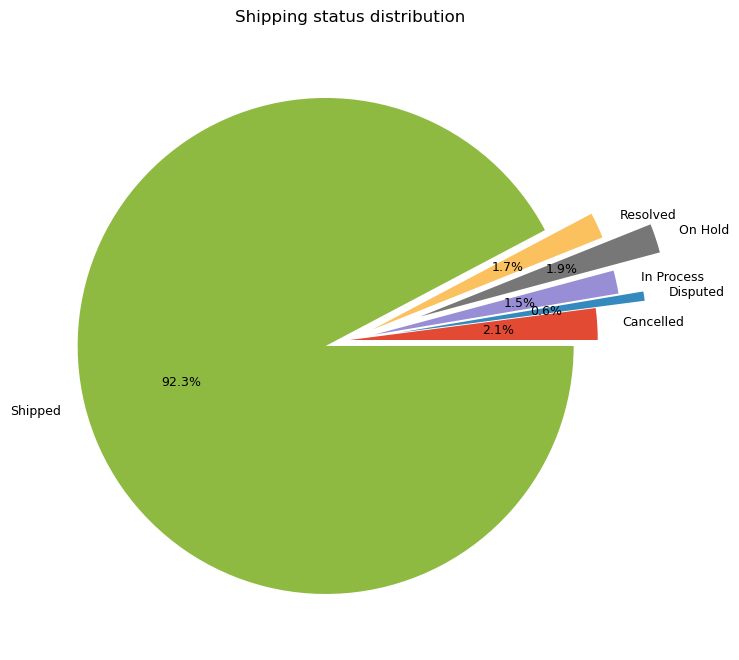

In [454]:
##Shipping Status 
gp_status = df.groupby(['STATUS'], as_index= False)['QUANTITYORDERED'].sum()
 
with plt.style.context('ggplot'):
  plt.figure(figsize=(8,10))
  plt.pie(gp_status.QUANTITYORDERED,labels = gp_status.STATUS , autopct='%.1f%%', textprops={'fontsize': 9},explode=[0,0.2,0.1,0.3,0.1,0.1])  
  plt.title('Shipping status distribution', fontdict={'fontsize':12})
plt.show()

# Insights
- We see more than 90% products are shippedwith just 2.1 cancelled and 0.6% disputed. 
    This signifies that the production and delivery chain is working smoothly with very little disputes and issues

# PART 8: 

# Findings on Deal SIze 

<AxesSubplot:ylabel='DEALSIZE'>

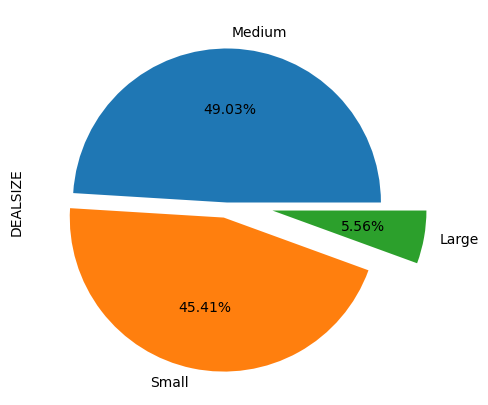

In [455]:
##Dealsize Distribution

df['DEALSIZE'].value_counts().plot.pie(figsize = (5,5), autopct = '%.2f%%',explode=[0,0.1,0.3])

<AxesSubplot:xlabel='PRODUCTLINE'>

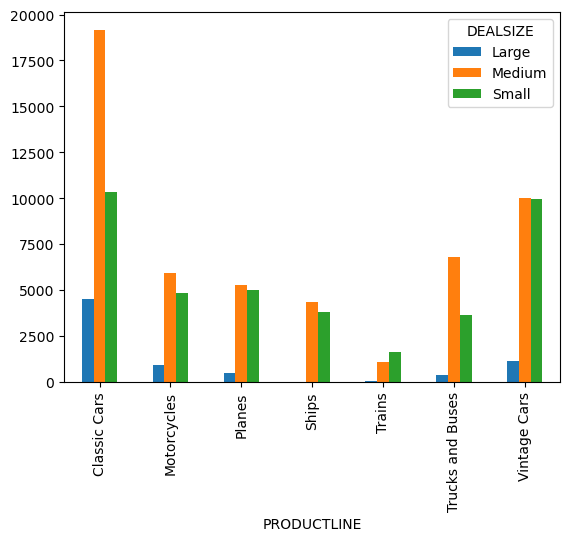

In [456]:
##DealSize against Quantity Ordered
df.groupby(["PRODUCTLINE","DEALSIZE"])["QUANTITYORDERED"].sum().unstack(level=1).plot.bar()


<AxesSubplot:xlabel='PRODUCTLINE'>

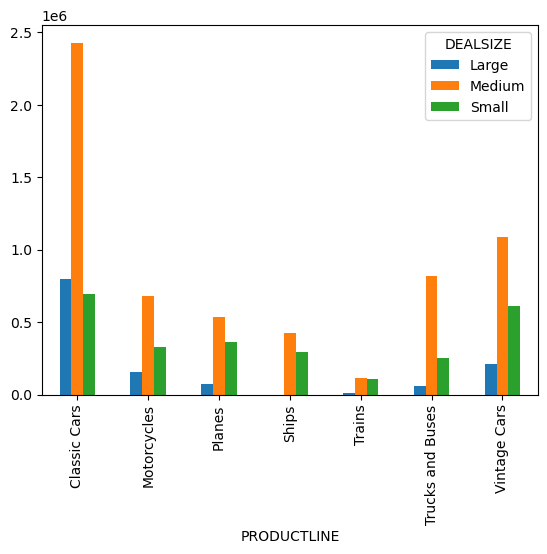

In [457]:
##DealSize against Sales
df.groupby(["PRODUCTLINE","DEALSIZE"])["SALES"].sum().unstack(level=1).plot.bar()

# Insights:

- We see that medium and small deliveries form the bulk of sales
- Very few large deliveries occur, and that too mostly for Classic cars products category 

# 3) Conclusions:

We can draw the following conclusions from our analysis
- EMEA is the biggest continental market for us
- But, the USA is the biggest national market, with American cities and clients forming a bulk of their respective lists
- Madrid is the top city for sales, and hevily responisble for a significantly large portion of EMEA sales.
- The APAC region is the smallest market with only two cities, Singapore and Mellbourne being significant markets.
- Product sales are extremely seasonal, with the months near the end of the year, especially Novembor being the best time.
- The company continues to deal in small and medium scale deliveries, with very few large scale deliveries made
- The company's production and deliver chain is very effecient with around 93% of product shipped and only 2.7% canceeled or in dispute.

